In [2]:
import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC
import string
import nltk
from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [3]:
le=LabelEncoder()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv('./../P6_P7_spam.csv',encoding='latin-1')

In [6]:
df=df[['v2','v1']]

In [7]:
df.rename(columns={'v2':'message','v1':'label'},inplace=True)

In [8]:
def processing_text(message):
    l=[i for i in message if i not in string.punctuation]
    s=''.join(l)
    return [w for w in s.split() if s.lower() not in stopwords.words('english')]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2,random_state=0)

In [10]:
a = CountVectorizer(analyzer=processing_text).fit(X_train)
b= a.transform(X_train)

c=TfidfTransformer(use_idf=False)
mess1 = c.transform(b)

In [11]:
svc=LinearSVC()

In [12]:
svc.fit(mess1,y_train)

LinearSVC()

In [13]:
e=a.transform(X_test)
mess2=c.transform(e)

In [14]:
y_pred=svc.predict(mess2)

In [15]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9811659192825112


Confusion matrix: 


<AxesSubplot:>

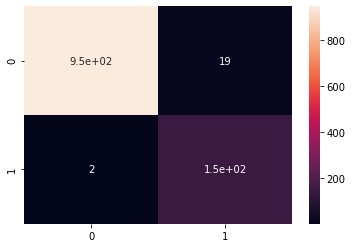

In [16]:
print("Confusion matrix: ")
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

## Bank Churners

In [25]:
df1=pd.read_csv('BankChurners.csv')

In [26]:
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [27]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [28]:
df1.isna().sum()
#pure

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [29]:
df1.rename(columns=
          {'CLIENTNUM':'id','Attrition_Flag':'Flag','Customer_Age':'Age','Dependent_count':'count',
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'NB_mon1',
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'NB_Mon2'
            },inplace=True)

In [30]:
df1.columns

Index(['id', 'Flag', 'Age', 'Gender', 'count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_mon1', 'NB_Mon2'],
      dtype='object')

In [31]:
df1['Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [32]:
svc1=LinearSVC()

In [33]:
for i in ['Gender','Education_Level','Marital_Status','Card_Category','Flag']:
    df1[i]=le.fit_transform(df1[i])

In [34]:
df1

,id,Flag,Age,Gender,count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_mon1,NB_Mon2
0,768805383,1,45,1,3,3,1,$60K - $80K,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,1,49,0,5,2,2,Less than $40K,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,1,51,1,3,2,1,$80K - $120K,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,1,40,0,4,3,3,Less than $40K,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,1,40,1,3,5,1,$60K - $80K,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,$40K - $60K,0,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,0,41,1,2,6,0,$40K - $60K,0,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,0,44,0,1,3,1,Less than $40K,0,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,0,30,1,2,2,3,$40K - $60K,0,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [35]:
X=df1.drop(['id','Flag','Income_Category'],axis=1)
y=df1['Flag']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
X_train.columns

Index(['Age', 'Gender', 'count', 'Education_Level', 'Marital_Status',
       'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'NB_mon1', 'NB_Mon2'],
      dtype='object')

In [40]:
svc1.fit(X_train,y_train)

C:\Users\Sonal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [41]:
y_pred=svc1.predict(X_test)

In [42]:
accuracy_score(y_pred,y_test)

0.8504442250740375

<AxesSubplot:>

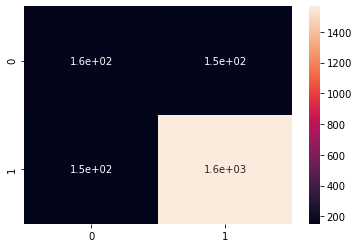

In [43]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [44]:
w=svc1.coef_[0]
a= -w[0]/w[1]

In [45]:
xx=np.linspace(-3,4)
yy=a*xx - svc1.intercept_[0]/w[1]

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [48]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Flag, Length: 10127, dtype: int32

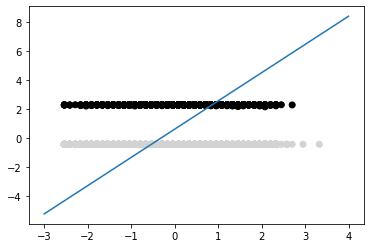

In [60]:
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(x=X_std[:,0],y=X_std[:,18],c=color)
plt.plot(xx,yy)

In [58]:
for i in svc1.coef_[0]:
    print(i)

-0.01672241038456072
0.00856834580098233
-0.02795079309954437
-0.014357109480123552
-0.019493200471336673
-7.869797343247682e-05
0.00555868971010492
0.030512246253272868
-0.03433633550818304
-0.0372191786985935
0.00019123719977729188
0.0003357404376163697
-0.00014450323783911975
0.003174294585643319
-0.00020273302970166945
0.021177820489384575
0.00955340042628413
0.00014578786132104168
-0.058869914877914806
0.053680587447085336


In [55]:
len(svc1.coef_[0])

20

In [59]:
X_train.columns

Index(['Age', 'Gender', 'count', 'Education_Level', 'Marital_Status',
       'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'NB_mon1', 'NB_Mon2'],
      dtype='object')